Proyek Analisis Data: Analisis Bike Sharing Dataset

Nama: Septi Aprilia Wulandari  
Email: septiapriliawulandari1@gmail.com  
ID Dicoding: septi-aprilia-w

Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Bagaimana Pengaruh Cuaca dan Musim Terhadap Jumlah Penyewaan Sepeda?
- Pertanyaan 2: Pada Jam Berapa Penyewaan Sepeda Terjadi Paling Banyak?

Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st

Load data

In [3]:
day_data = pd.read_csv('dashboard/data/day.csv')
hour_data = pd.read_csv('dashboard/data/hour.csv')

Pertanyaan Bisnis 1: Bagaimana Pengaruh Cuaca dan Musim Terhadap Jumlah Penyewaan Sepeda?

2024-07-31 21:03:43.320 
  command:

    streamlit run c:\Users\wulandari\AppData\Local\Programs\Python\Python312\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


DeltaGenerator()

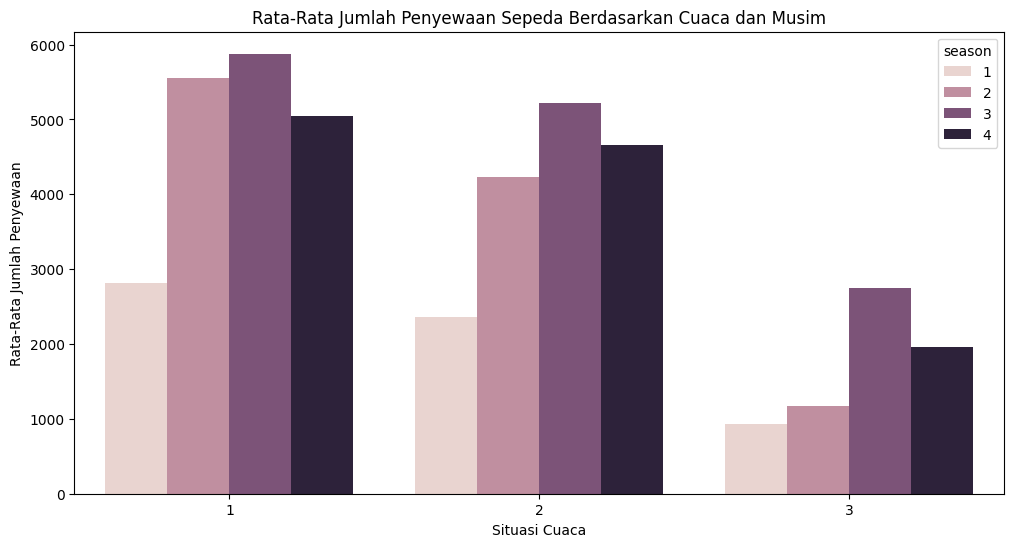

In [4]:
st.header('Pengaruh Cuaca dan Musim Terhadap Jumlah Penyewaan Sepeda')
weather_season_grouped = day_data.groupby(['weathersit', 'season']).agg({'cnt': 'mean'}).reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='weathersit', y='cnt', hue='season', data=weather_season_grouped)
plt.title('Rata-Rata Jumlah Penyewaan Sepeda Berdasarkan Cuaca dan Musim')
plt.xlabel('Situasi Cuaca')
plt.ylabel('Rata-Rata Jumlah Penyewaan')
st.pyplot(plt)

Pertanyaan Bisnis 2: Pada Jam Berapa Penyewaan Sepeda Terjadi Paling Banyak

In [5]:
st.header('Jam-Jam Sibuk untuk Penyewaan Sepeda')
hour_grouped = hour_data.groupby('hr').agg({'cnt': 'mean'}).reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x='hr', y='cnt', data=hour_grouped, marker='o')
plt.title('Rata-Rata Jumlah Penyewaan Sepeda Berdasarkan Jam')
plt.xlabel('Jam dalam Sehari')
plt.ylabel('Rata-Rata Jumlah Penyewaan')
st.pyplot(plt)

DeltaGenerator()

Mengidentifikasi anomali dalam penyewaan sepeda

In [6]:
st.header('Identifikasi Anomali dalam Penyewaan Sepeda')
plt.figure(figsize=(12, 6))
sns.boxplot(x=day_data['cnt'])
plt.title('Boxplot Jumlah Penyewaan Sepeda untuk Identifikasi Anomali')
plt.xlabel('Jumlah Penyewaan Sepeda')
st.pyplot(plt)

DeltaGenerator()

Data Wrangling

In [7]:
st.header('Pengolahan Data')
st.write('Data Harian:')
st.dataframe(day_data.head())
st.write('Data Per Jam:')
st.dataframe(hour_data.head())

DeltaGenerator()

Exploratory Data Analysis

- Memilih hanya kolom numerik untuk menghitung korelasi

In [8]:
numeric_columns = day_data.select_dtypes(include=['number'])

Membuat Heatmap korelasi untuk kolom numerik

In [9]:
st.header('Analisis Data Eksploratif')
st.write('Heatmap Korelasi untuk Data Harian:')
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_columns.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap Korelasi Antar Fitur')
st.pyplot(plt)

DeltaGenerator()

Data Visualization

In [10]:
st.header('Visualisasi Data Penyewaan Sepeda')
st.write('Distribusi Jumlah Penyewaan Sepeda:')
plt.figure(figsize=(12, 6))
sns.histplot(day_data['cnt'], bins=30, kde=True, color='blue')
plt.title('Distribusi Jumlah Penyewaan Sepeda')
plt.xlabel('Jumlah Penyewaan')
plt.ylabel('Frekuensi')
st.pyplot(plt)

DeltaGenerator()

Kesimpulan

- Kesimpulan Pertanyaan 1 : Dari analisis yang dilakukan, ditemukan bahwa **cuaca dan musim** secara signifikan mempengaruhi jumlah penyewaan sepeda. Situasi cuaca yang lebih baik dan musim yang lebih hangat cenderung meningkatkan jumlah penyewaan sepeda.

- Kesimpulan Pertanyaan 2 : Dari analisis waktu dalam sehari, terlihat bahwa **jam sibuk** penyewaan sepeda terjadi pada pagi hari sekitar jam 8 dan sore hari sekitar jam 17, yang kemungkinan besar terkait dengan waktu berangkat dan pulang kerja.